In [57]:
from scipy import stats, integrate
import matplotlib.pyplot as plt
import math
import pandas as pd
%matplotlib inline

In [58]:
import seaborn as sns
sns.set(color_codes=True)

In [59]:
data_file=r"C:\Users\Ajinkya\Downloads\\Data-File-IONEnergy.csv"

In [60]:
ion = pd.read_csv(data_file)

In [11]:
# Intial 50 rows of the dataset
ion.head(50) 

,Timestamp,Current,Total voltage,SOC,Temperature,SOH,Equivalent cycle,Application status,Grid status,Grid power,Grid energy consumption,Grid cumulative energy consumption
0,1556701215000,0,66.72,1.0,25.229167,1.000000,0.0,1,1,0.0,0.0,0.0
1,1556702215000,0,66.72,1.0,25.528210,0.999774,0.0,1,1,0.0,0.0,0.0
2,1556703215000,0,66.72,1.0,25.859735,0.999679,0.0,1,1,0.0,0.0,0.0
3,1556704215000,0,66.72,1.0,26.204830,0.999606,0.0,1,1,0.0,0.0,0.0
4,1556705215000,0,66.72,1.0,26.553448,0.999542,0.0,1,1,0.0,0.0,0.0
5,1556706215000,0,66.72,1.0,26.899805,0.999485,0.0,1,1,0.0,0.0,0.0
6,1556707215000,0,66.72,1.0,27.240183,0.999433,0.0,1,1,0.0,0.0,0.0
7,1556708215000,0,66.72,1.0,27.571878,0.999385,0.0,1,1,0.0,0.0,0.0
8,1556709215000,0,66.72,1.0,27.892704,0.999339,0.0,1,1,0.0,0.0,0.0
9,1556710215000,0,66.72,1.0,28.200757,0.999295,0.0,1,1,0.0,0.0,0.0


### Relation between SOC and Grid status

In [12]:
# Distribution of the column Grid status
ion["Grid status"].value_counts()

1    30735
0      369
Name: Grid status, dtype: int64

In [29]:
# Distribution of SOC data 
ion["SOC"].describe()

count    31104.000000
mean         0.828945
std          0.134033
min         -0.155714
25%          0.781742
50%          0.901914
75%          0.905029
max          1.000000
Name: SOC, dtype: float64

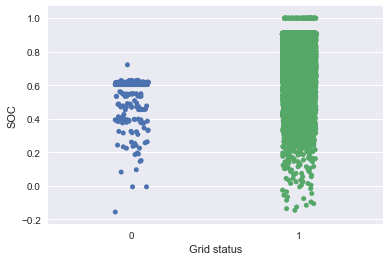

In [32]:
# Strip plot between Grid status and SOC
sns.stripplot(x="Grid status", y="SOC", data=eb, jitter=True, size=5)

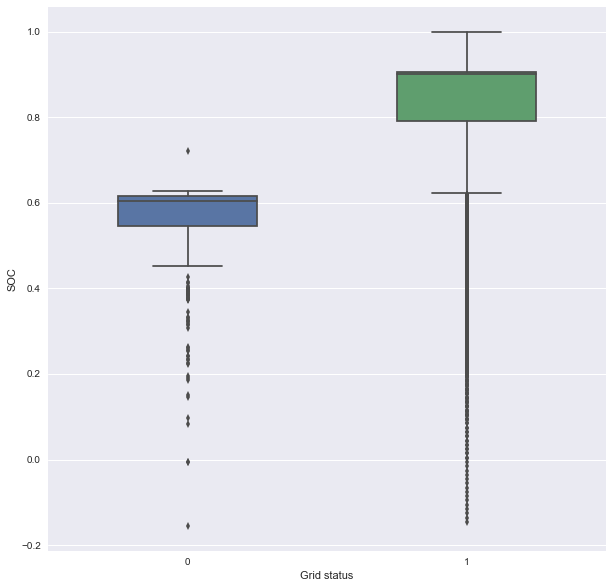

In [79]:
# Since Grid status is catergorical column hence we use boxplot to understand the correlation between it and SOC
plt.figure(figsize=(10,10))
sns.boxplot(x="Grid status", y="SOC", data=eb,width=0.5)

### Relation between SOH and Equivalent cycle

In [39]:
# distribution of SOH data column
ion["SOH"].describe()

count    31104.000000
mean         0.948226
std          0.019635
min          0.919398
25%          0.932068
50%          0.945187
75%          0.963154
max          1.000000
Name: SOH, dtype: float64

In [40]:
# distribution of Equivalent cycle column
ion["Equivalent cycle"].describe()

count    31104.000000
mean        52.563840
std         31.301743
min          0.000000
25%         24.438458
50%         52.499507
75%         77.241660
max        107.847718
Name: Equivalent cycle, dtype: float64

C:\Users\Ajinkya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


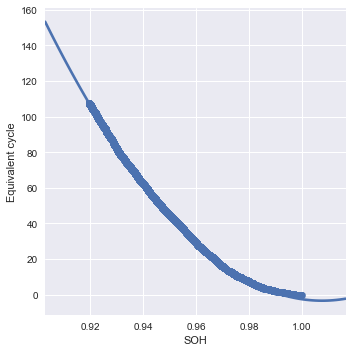

In [46]:
# 2nd defree regression plot between SOH and Equivalent cycle
sns.lmplot(x="SOH", y="Equivalent cycle", data=ion, order=2)

### Relation between SOC and Temperature

In [47]:
# distribution of SOC data column 
ion["SOC"].describe()

count    31104.000000
mean         0.828945
std          0.134033
min         -0.155714
25%          0.781742
50%          0.901914
75%          0.905029
max          1.000000
Name: SOC, dtype: float64

In [49]:
# distribution of temperature data column
ion["Temperature"].describe()

count    31104.000000
mean        27.915732
std         13.308070
min         20.263275
25%         22.272948
50%         26.060848
75%         29.523420
max        136.118156
Name: Temperature, dtype: float64

C:\Users\Ajinkya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


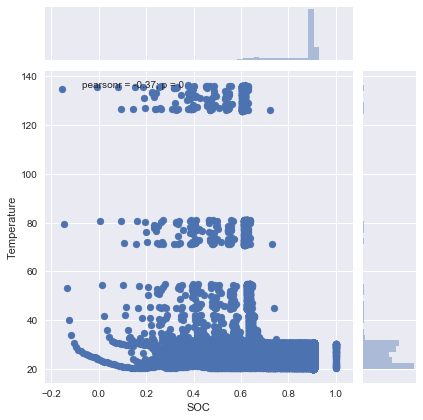

In [73]:
# scatter plot between SOC and Temperature
sns.jointplot(x="SOC", y="Temperature", data=ion, kind="scatter")